#Intialise dataframe# 

In [22]:
import csv
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


def read_data():
    with open(r"C:\Users\20231596\shark-doo-doo-1\code\cleaned_data.csv") as file:
        data = list(csv.reader(file))
        df = pd.DataFrame(data[1:], columns=data[0])
        df.columns = [
    'Year',
    'Provocation',
    'Activity',
    'Day',
    'Month',
    'Injury',
    'State',
    'Latitude',
    'Longitude',
    'SharkName',
    'SharkLength',
    'InjuryLocation',
    'Gender',
    'Age',
    'IncidentTime',
    'SharkScientific'
]

        print(df.head())
        return df


df_data = read_data()


   Year Provocation  Activity   Day Month   Injury State      Latitude  \
0  1791  unprovoked  swimming   1.0     1    fatal   NSW  -33.86666667   
1  1803  unprovoked  swimming  22.0     3  injured    WA  -25.83333333   
2  1807  unprovoked  swimming  18.0     1  injured   NSW  -33.86666667   
3  1820    provoked  swimming   1.0     1    fatal   TAS         -42.8   
4  1825  unprovoked  swimming   1.0     1  injured   NSW        -33.85   

     Longitude        SharkName         SharkLength    InjuryLocation  Gender  \
0        151.2      white shark               3.375         ['torso']  female   
1  113.8833333      tiger shark   3.166265060240964       ['Unknown']    male   
2        151.2       bull shark  2.4013698630136986  ['arm,', 'hand']    male   
3  147.5333333  unknown species  1.9428571428571428           ['leg']    male   
4  151.2166667       bull shark  2.4013698630136986           ['leg']    male   

    Age IncidentTime         SharkScientific  
0                    

Missing values

Text(0, 0.5, 'Frequency')

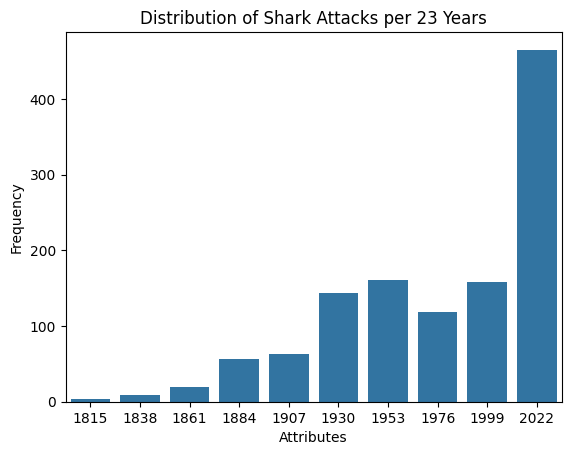

In [23]:
def Bins(df, attribute:str):
    min_year = float(df[attribute].min())
    max_year = float(df[attribute].max())
    num_bins = 10
    bin_size= (max_year-min_year)/num_bins
    bins = [0]*num_bins
    counter = 0
    current_year = min_year
    frequency = [0]*num_bins

    while counter < num_bins:
        current_year = current_year+bin_size
        bins[counter] = math.ceil(current_year)
        counter +=1

    for year in df_data['Year']:
        year = int(year)
        for value in bins:
            if year <= value:
                frequency[bins.index(value)]+=1
                break

    return bins,frequency

bins,frequency = Bins(df = df_data, attribute='Year')
data = pd.DataFrame({"Attributes": bins, "Frequency": frequency})

# Plot using seaborn
sns.barplot(x="Attributes", y="Frequency", data=data)

# Add labels and title
plt.title("Distribution of Shark Attacks per 23 Years")
plt.xlabel("Attributes")
plt.ylabel("Frequency")
#modified_labels = ["1791-1815", "1815-1838", "1838-1861","1861-1884", "1884-1907", "1907-1930", '1930-1953','1953-1976','1976-1999','1999-2022']
#plt.xticks(ticks=range(len(bins)), labels=modified_labels)

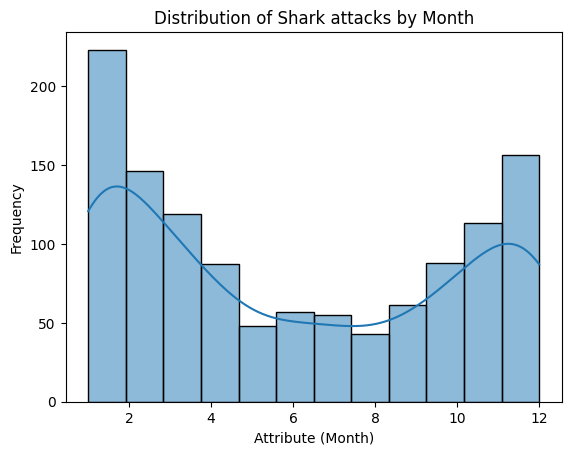

In [24]:
# Convert the 'Month' column to numeric (if not already)
df_data["Month"] = pd.to_numeric(df_data["Month"])

# Sort the DataFrame by 'Month'
df_inj_sorted = df_data.sort_values(by="Month")

# Plot the distribution
sns.histplot(df_inj_sorted["Month"], kde=True, bins=12)
plt.title("Distribution of Shark attacks by Month")
plt.xlabel("Attribute (Month)")
plt.ylabel("Frequency")
plt.show()


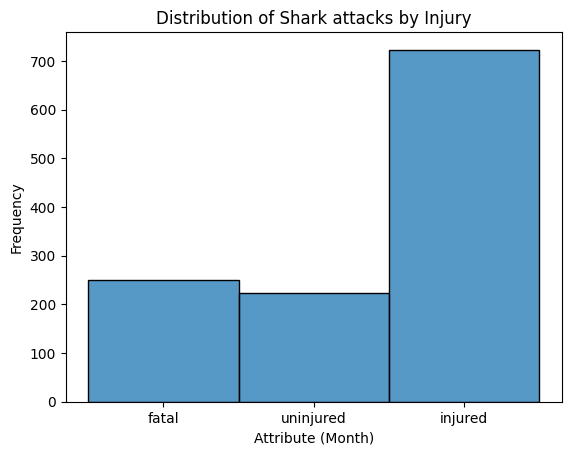

In [25]:
sns.histplot(df_inj_sorted["Injury"], bins=12)
plt.title("Distribution of Shark attacks by Injury")
plt.xlabel("Attribute (Month)")
plt.ylabel("Frequency")
plt.show()

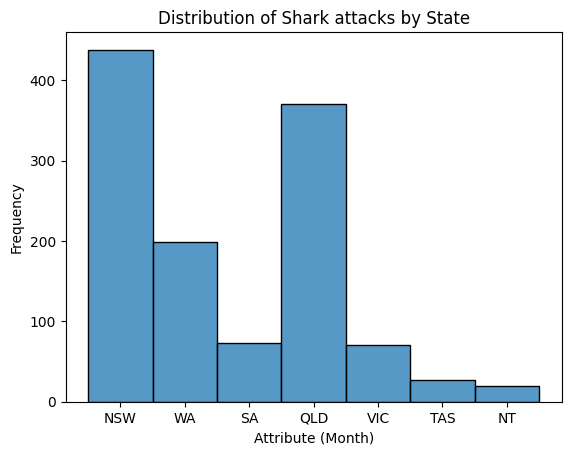

In [26]:
sns.histplot(df_inj_sorted["State"], bins=12)
plt.title("Distribution of Shark attacks by State")
plt.xlabel("Attribute (Month)")
plt.ylabel("Frequency")
plt.show()

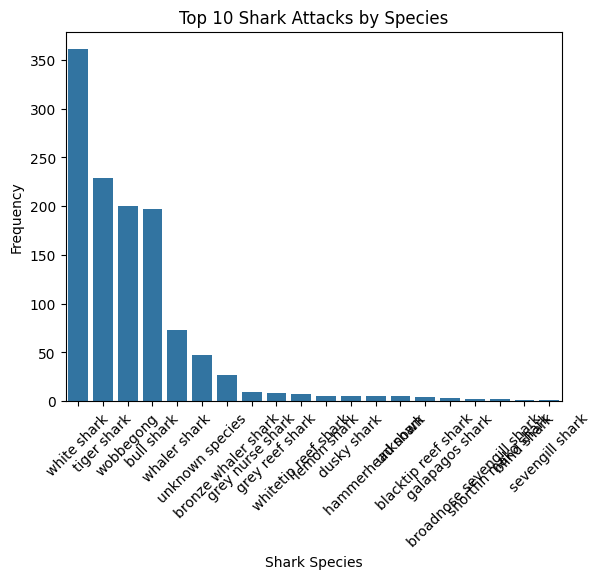

SharkName
white shark                  361
tiger shark                  229
wobbegong                    200
bull shark                   197
whaler shark                  73
unknown species               47
bronze whaler shark           27
grey nurse shark               9
grey reef shark                8
whitetip reef shark            7
lemon shark                    5
dusky shark                    5
hammerhead shark               5
unknown                        5
blacktip reef shark            4
galapagos shark                3
broadnose sevengill shark      2
shortfin mako shark            2
blind shark                    1
sevengill shark                1
Name: count, dtype: int64

In [27]:
# Aggregate the frequency of each SharkName
top_20_sharks = df_inj_sorted["SharkName"].value_counts().nlargest(20)

# Plot the distribution of the top 10 categories
sns.barplot(x=top_20_sharks.index, y=top_20_sharks.values)

# Add title and labels
plt.title("Top 10 Shark Attacks by Species")
plt.xlabel("Shark Species")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()

top_20_sharks
# we have 47 attacks from unkown shark!

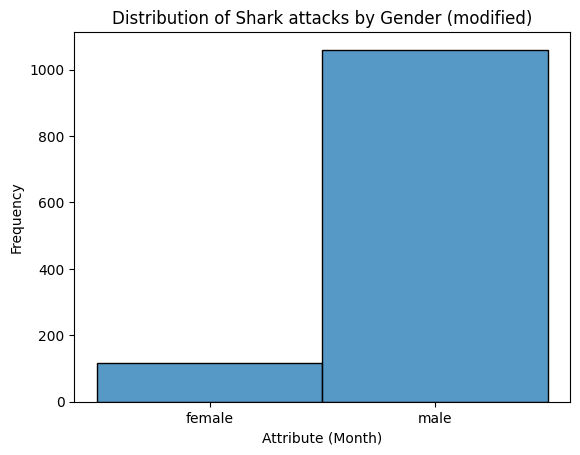

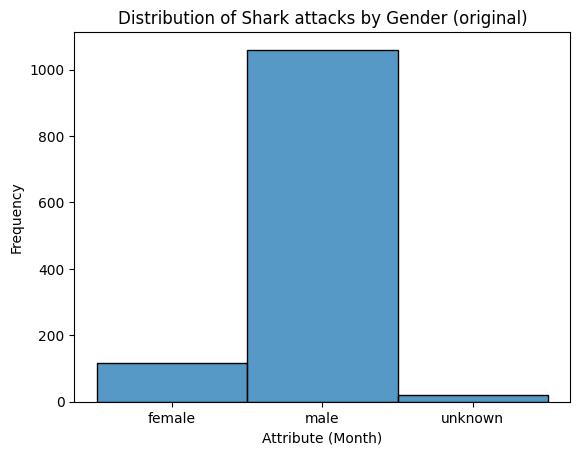

In [28]:
# Keep only rows where 'Gender' is 'male' or 'female'
df_inj_changed = df_data[df_data["Gender"].isin(["male", "female"])]

sns.histplot(df_inj_changed["Gender"], bins=12)
plt.title("Distribution of Shark attacks by Gender (modified)")
plt.xlabel("Attribute (Month)")
plt.ylabel("Frequency")
plt.show()


sns.histplot(df_data["Gender"], bins=12)
plt.title("Distribution of Shark attacks by Gender (original)")
plt.xlabel("Attribute (Month)")
plt.ylabel("Frequency")
plt.show()

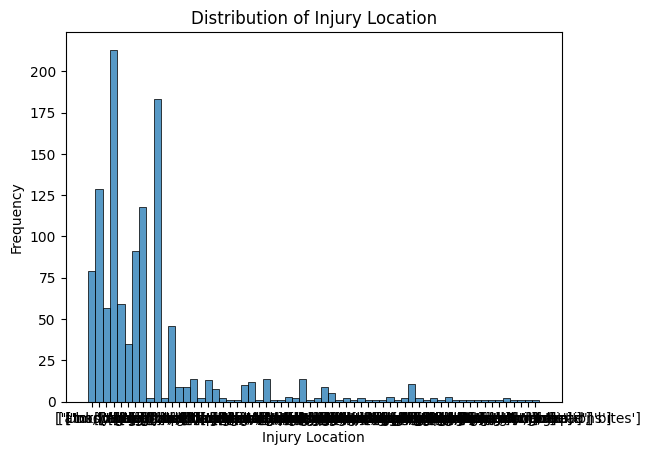

In [29]:


sns.histplot(df_data['InjuryLocation'])
plt.title("Distribution of Injury Location")
plt.xlabel("Injury Location")
plt.ylabel("Frequency")
plt.show()

In [30]:
import re 

injury_categories = set()
for entry in df_data['InjuryLocation']:
    # Remove surrounding brackets and quotes
    cleaned = re.sub(r"[\[\]']", "", entry)  # Remove brackets and quotes
    # Split the string into parts, strip commas and extra spaces
    parts = [word.strip(", ").lower() for word in cleaned.split(",") if word.strip()]
    injury_categories.update(parts)  # Add to the set to ensure uniqueness

# Step 2: Convert the set to a sorted list
injury_categories = sorted(injury_categories)

print(injury_categories)


['ankle', 'arm', 'bites', 'body', 'body not found', 'calf', 'foot', 'half', 'hand', 'head', 'lacerations', 'leg', 'minor', 'multiple', 'of', 'other:', 'pelvic region', 'recovered', 'shoulder', 'thigh', 'torso', 'uninjured', 'unknown']
